In [41]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import matplotlib
import os
from PIL import Image
import random

In [11]:
downSize = (32, 32)
imageCount = dict()

### Balancing Training Data

In [12]:
trainPath  = "../data/train/"
for dirpath, dirnames, filenames in os.walk("../data/train/"):
    if dirpath != trainPath:
        imageCount[dirpath.split("/")[-1]] = len(filenames)
print(imageCount)

{'distressed': 16529, 'non-distressed': 12180}


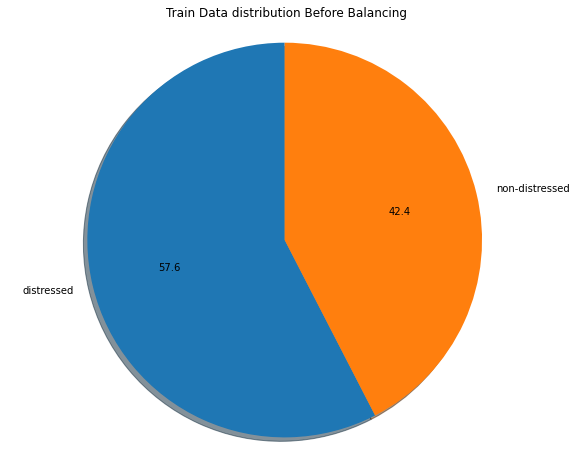

In [25]:
trainPieValue = []
trainPieCategory = []
for k, v in imageCount.items():
    trainPieValue.append(v)
    trainPieCategory.append(k)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(trainPieValue, labels=trainPieCategory, autopct='%1.1f', shadow=True, startangle=90)
ax1.axis('equal')  
ax1.title.set_text("Train Data distribution Before Balancing")
plt.show()

In [24]:
print("file to remove: ", 16529-12180)

file to remove:  4349


In [27]:
toRemovePath = random.sample(os.listdir(trainPath+"distressed"),  k=4349)
print(toRemovePath[:10])

['Training_5188070.jpg', 'Training_45755172.jpg', 'Training_32769196.jpg', 'Training_28155447.jpg', 'Training_48059454.jpg', 'Training_1750943.jpg', 'Training_36418818.jpg', 'Training_43704846.jpg', 'Training_44719671.jpg', 'Training_20371573.jpg']


In [28]:
for path in toRemovePath:
    os.remove(trainPath+"distressed/"+path)

In [30]:
trainPath  = "../data/train/"
for dirpath, dirnames, filenames in os.walk("../data/train/"):
    if dirpath != trainPath:
        imageCount[dirpath.split("/")[-1]] = len(filenames)
print(imageCount)

{'distressed': 12180, 'non-distressed': 12180}


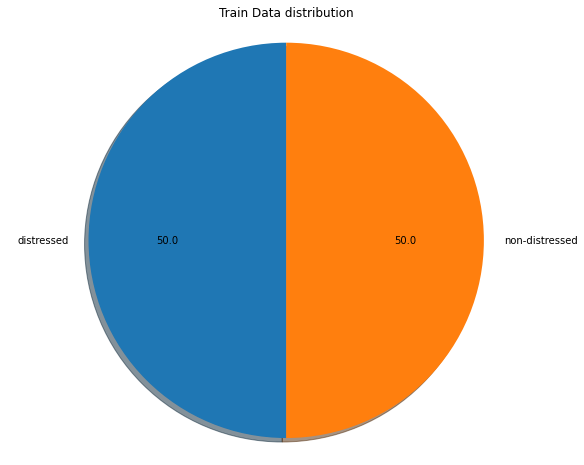

In [31]:
trainPieValue = []
trainPieCategory = []
for k, v in imageCount.items():
    trainPieValue.append(v)
    trainPieCategory.append(k)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(trainPieValue, labels=trainPieCategory, autopct='%1.1f', shadow=True, startangle=90)
ax1.axis('equal')  
ax1.title.set_text("Train Data distribution")
plt.show()

### Generate Pixelated Images

In [34]:
numPixelated = int(12180 * .1)
print("num of pixelated images to generate: ", numPixelated)

num of pixelated images to generate:  1218


In [35]:
randDistresstedPixelated = random.sample(os.listdir(trainPath+"distressed"),  k=numPixelated)
randNonDistresstedPixelated = random.sample(os.listdir(trainPath+"non-distressed"),  k=numPixelated)
print("randomly choose distressed images to pixelate: ", randDistresstedPixelated[:10])
print("randomly choose non-distressed images to pixelate: ", randNonDistresstedPixelated[:10])

randomly choose distressed images to pixelate:  ['Training_35530157.jpg', 'Training_59584482.jpg', 'Training_39280728.jpg', 'Training_82099904.jpg', 'Training_51731782.jpg', 'Training_36409241.jpg', 'Training_46026126.jpg', 'Training_47577942.jpg', 'Training_18843463.jpg', 'Training_40392654.jpg']
randomly choose non-distressed images to pixelate:  ['Training_29335469.jpg', 'Training_25225987.jpg', 'Training_53143946.jpg', 'Training_86569390.jpg', 'Training_49649985.jpg', 'Training_40272586.jpg', 'Training_83400862.jpg', 'Training_30887606.jpg', 'Training_92910271.jpg', 'Training_96435627.jpg']


In [43]:
distressedPath = trainPath+"distressed/"
for imgName in randDistresstedPixelated:
    img = Image.open(distressedPath+imgName)
    imgSmall = img.resize(downSize, resample=Image.BILINEAR)
    result = imgSmall.resize(img.size,Image.NEAREST)
    result.save(distressedPath+"Pixelated_"+imgName)

In [54]:
nondistressedPath = trainPath+"non-distressed/"
for imgName in randNonDistresstedPixelated:
    img = Image.open(nondistressedPath+imgName)
    imgSmall = img.resize(downSize, resample=Image.BILINEAR)
    result = imgSmall.resize(img.size,Image.NEAREST)
    result.save(nondistressedPath+"Pixelated_"+imgName)

Training_16196304.jpg


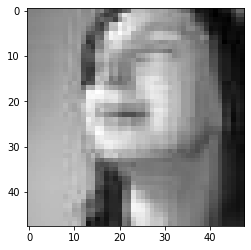

In [64]:
disImageName = random.choice(randDistresstedPixelated)
print(disImageName)
plt.figure()
img = mpimg.imread(distressedPath+"Pixelated_"+disImageName)
imgplot = plt.imshow(img, cmap="gray")
plt.show() 

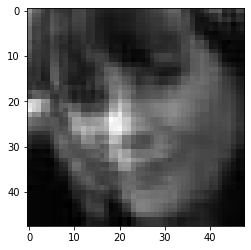

In [63]:
nondisImageName = random.choice(randNonDistresstedPixelated)
plt.figure()
img = mpimg.imread(nondistressedPath+"Pixelated_"+nondisImageName)
imgplot = plt.imshow(img, cmap="gray")
plt.show() 

In [65]:
trainPath  = "../data/train/"
for dirpath, dirnames, filenames in os.walk("../data/train/"):
    if dirpath != trainPath:
        imageCount[dirpath.split("/")[-1]] = len(filenames)
print(imageCount)

{'distressed': 13399, 'non-distressed': 13399}


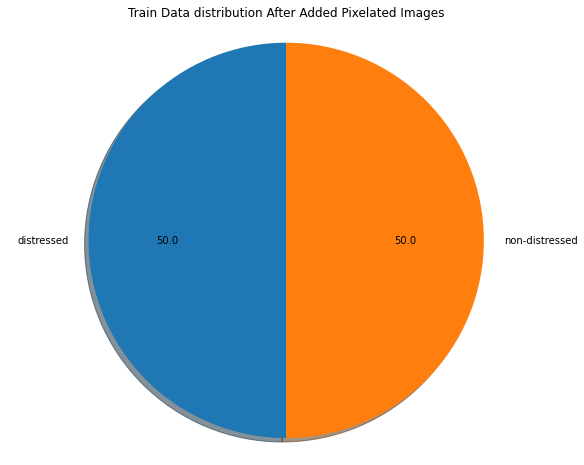

In [66]:
trainPieValue = []
trainPieCategory = []
for k, v in imageCount.items():
    trainPieValue.append(v)
    trainPieCategory.append(k)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(trainPieValue, labels=trainPieCategory, autopct='%1.1f', shadow=True, startangle=90)
ax1.axis('equal')  
ax1.title.set_text("Train Data distribution After Added Pixelated Images")
plt.show()

In [68]:
testPath = "../data/test/"

In [72]:
testImageCount = {}
for dirpath, dirnames, filenames in os.walk(testPath):
    if dirpath != testPath:
        testImageCount[dirpath.split("/")[-1]] = len(filenames)
print(testImageCount)

{'distressed': 4172, 'non-distressed': 3007}


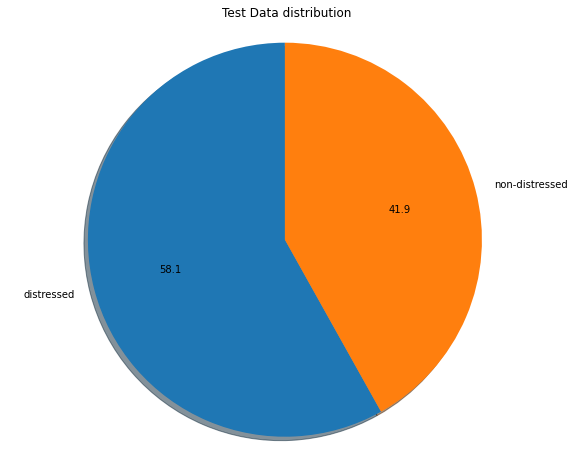

In [73]:
testPieValue = []
testPieCategory = []
for k, v in testImageCount.items():
    testPieValue.append(v)
    testPieCategory.append(k)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(testPieValue, labels=testPieCategory, autopct='%1.1f', shadow=True, startangle=90)
ax1.axis('equal')  
ax1.title.set_text("Test Data distribution")
plt.show()

In [74]:
testDisNum = int(testImageCount['distressed']*.05)
testNonDisNum = int(testImageCount['non-distressed']*.05)
print("number of pixelated image for test distressed: ", testDisNum)
print("number of pixelated image for test non-distressed: ", testNonDisNum)

number of pixelated image for test distressed:  208
number of pixelated image for test non-distressed:  150


In [76]:
randTestDistresstedPixelated = random.sample(os.listdir(testPath+"distressed"),  k=testDisNum)
randTestNonDistresstedPixelated = random.sample(os.listdir(testPath+"non-distressed"),  k=testNonDisNum)
print("randomly choose test distressed images to pixelate: ", randTestDistresstedPixelated[:10])
print("randomly choose test non-distressed images to pixelate: ", randTestNonDistresstedPixelated[:10])

randomly choose test distressed images to pixelate:  ['PublicTest_68478226.jpg', 'PrivateTest_95435599.jpg', 'PublicTest_97902387.jpg', 'PrivateTest_63060469.jpg', 'PublicTest_66116810.jpg', 'PublicTest_22935346.jpg', 'PublicTest_35290127.jpg', 'PrivateTest_98799539.jpg', 'PrivateTest_30802398.jpg', 'PrivateTest_6116699.jpg']
randomly choose test non-distressed images to pixelate:  ['PublicTest_249914.jpg', 'PrivateTest_45910002.jpg', 'PrivateTest_89545818.jpg', 'PublicTest_38619150.jpg', 'PublicTest_4815338.jpg', 'PrivateTest_698548.jpg', 'PrivateTest_36183074.jpg', 'PublicTest_32960343.jpg', 'PrivateTest_20364883.jpg', 'PublicTest_77414793.jpg']


In [78]:
testDistressedPath = testPath+"distressed/"
for imgName in randTestDistresstedPixelated:
    img = Image.open(testDistressedPath+imgName)
    imgSmall = img.resize(downSize, resample=Image.BILINEAR)
    result = imgSmall.resize(img.size,Image.NEAREST)
    result.save(testDistressedPath+"Pixelated_"+imgName)

In [80]:
testNonDistressedPath = testPath+"non-distressed/"
for imgName in randTestNonDistresstedPixelated:
    img = Image.open(testNonDistressedPath+imgName)
    imgSmall = img.resize(downSize, resample=Image.BILINEAR)
    result = imgSmall.resize(img.size,Image.NEAREST)
    result.save(testNonDistressedPath+"Pixelated_"+imgName)

PrivateTest_26560060.jpg


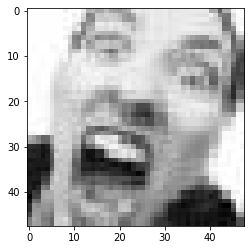

In [82]:
disTestImageName = random.choice(randTestDistresstedPixelated)
print(disTestImageName)
plt.figure()
img = mpimg.imread(testDistressedPath+"Pixelated_"+disTestImageName)
imgplot = plt.imshow(img, cmap="gray")
plt.show() 

PublicTest_74743310.jpg


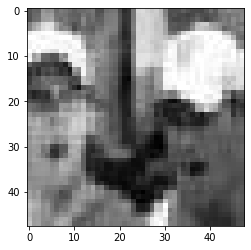

In [83]:
nondisTestImageName = random.choice(randTestNonDistresstedPixelated)
print(nondisTestImageName)
plt.figure()
img = mpimg.imread(testNonDistressedPath+"Pixelated_"+nondisTestImageName)
imgplot = plt.imshow(img, cmap="gray")
plt.show() 

In [84]:
testImageCount = {}
for dirpath, dirnames, filenames in os.walk(testPath):
    if dirpath != testPath:
        testImageCount[dirpath.split("/")[-1]] = len(filenames)
print(testImageCount)

{'distressed': 4380, 'non-distressed': 3157}


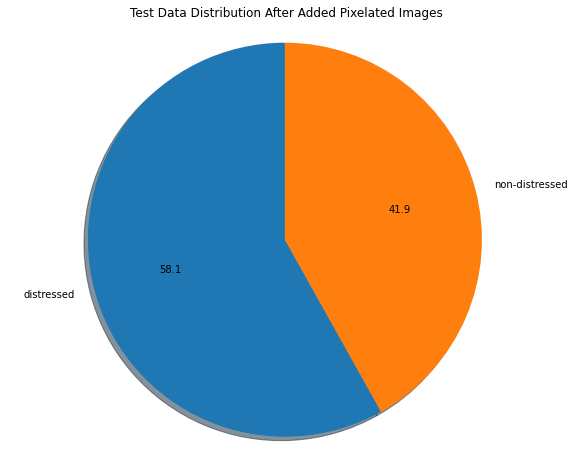

In [85]:
testPieValue = []
testPieCategory = []
for k, v in testImageCount.items():
    testPieValue.append(v)
    testPieCategory.append(k)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(testPieValue, labels=testPieCategory, autopct='%1.1f', shadow=True, startangle=90)
ax1.axis('equal')  
ax1.title.set_text("Test Data Distribution After Added Pixelated Images")
plt.show()